In [1]:
! python -V

Python 3.7.12


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cat /etc/issue

Ubuntu 18.04.5 LTS \n \l



In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [5]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        1.3G         10G        1.2M        826M         11G
Swap:            0B          0B          0B


In [6]:
!nvidia-smi

Mon Mar 14 07:43:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from keras.preprocessing.text import Tokenizer


class pre_processing:
    def __init__(self):
        nltk.download("punkt")  # トークン化データダウンロード
        nltk.download("averaged_perceptron_tagger")  # 品詞タグ付けデータダウンロード
        nltk.download("stopwords")  # ストップワードデータダウンロード
        nltk.download("wordnet")  # WordNetデータダウンロード

    # トークン化
    def tokenization_sentence(self, req_text):
        tokenizer = RegexpTokenizer(r"\w+")  # 句読点除去設定
        req_text = tokenizer.tokenize(req_text)  # トークン化
        return req_text

    # ストップワード除去
    def clean_text(self, req_text):
        stopset = set(stopwords.words("english"))  # ストップワード取得
        req_text = [word for word in req_text if word not in stopset]  # ストップワード除去
        req_text = [word for word in req_text if word.isalpha()]  # 文字以外除去
        return req_text

    # レンマ化
    def lemmatizer_sentence(self, req_text):
        lemmatizer = WordNetLemmatizer()  # レンマ化クラスインスタンス
        req_text = [lemmatizer.lemmatize(word) for word in req_text]  # レンマ化
        return req_text
    
    # 名詞抽出
    def part_of_speech(self, req_text):
        print(pos_tag(req_text))
        req_text = [pos_word[0] for pos_word in pos_tag(req_text) if pos_word[1] == "NN" or pos_word[1] == "NNP" or pos_word[1] == "VB" or pos_word[1] == "VBN"]
        return req_text


if __name__ == "__main__":
    pass

In [8]:
import gensim.models.keyedvectors as word2vec
from gensim.models import Word2Vec
import numpy as np


class feature_extraction:
    def __init__(self, word2vec_init=None, bert_init=None):
        self.word2vec_init = word2vec_init
        self.bert_init = bert_init
        if word2vec_init:
            self.word2vec_model = word2vec.KeyedVectors.load_word2vec_format(
                "/content/drive/MyDrive/00_卒論/99_作業フォルダー/2021_Saikawa/Identifying_test/dataset/GoogleNews-vectors-negative300.bin", binary=True
            )
        if bert_init:
            pass

    def word2vec(self, x_req_sentence):
        if self.word2vec_init:
            word2vec_sentence = [
                self.word2vec_model[word]
                for word in x_req_sentence
                if word in self.word2vec_model
            ]  # Word2Vexを用いた要求分のベクトル化
            return word2vec_sentence
        else:
            print("エラー: モデルデータが読み込まれていませんクラスインスタンス引数 word2vec_init=True 指定してください。")
    
    def similarity(self, test_sentence):
        searchCategorysWords = {
            "A": [
                "restart",
                "Availability",
                "permission",
                "component",
                "available",
                "backup",
                "achieve",
                "period",
                "stop",
                "case",
                "requirement",
                "obstacle",
                "addition",
                "schedule",
                "risk",
                "device",
                "external",
                "time",
                "year",
                "day",
                "hour"
            ],
            "FT": [
                "operate",
                "unavailable",
                "avoidance",
                "restored",
                "failure",
                "remain",
                "offline",
                "tolerance",
                "Fault",
                "preference",
                "adoption",
            ],
            "L": [
                "law",
                "ramification",
                "insurance",
                "standard",
                "Legal",
                "definition",
                "regulation",
                "liability",
                "license",
                "regulations",
                "audit",
                "custodian",
                "scope",
                "jurisdiction",
                "comply",
                "lawyer",
                "dispute",
                "auditer",
            ],
            "LF": [
                "green",
                "appealing",
                "picture",
                "font",
                "red",
                "look",
                "feel",
                "simple",
                "color",
                "blue",
                "graphic",
                "schema",
                "thump",
                "magnify",
                "interface",
                "page",
                "message",
            ],
            "MN": [
                "contract",
                "configurable",
                "surveillance",
                "manual",
                "change",
                "new",
                "counter",
                "installation",
                "able",
                "method",
                "recovery",
                "maintain",
                "update",
                "integrate",
                "products",
                "services",
                "error",
                "interval",
                "port",
                "external",
                "maintenance",
                "release",
            ],
            "O": [
                "model",
                "services",
                "extraction",
                "infrastructure",
                "external",
                "interoperability",
                "error",
                "manual",
                "mysql",
                "machine",
                #"products",
                "counter",
                "operate",
                "surveillance",
                "environment",
                "platform",
                "installation",
                "contract",
                "interval",
                "method",
                "Operational",
                "operation",
                "interchange",
                "recovery",
                "format",
                "support",
                #"database",
                "use",
                "protein",
                "install",
                "application",
                "server",
                "integrate",
                "provide",
                "access",
                "cash",
            ],
            "PE": [
                "peak",
                "processor",
                "trans",
                "means",
                "throughput",
                "alternative",
                "startup",
                "transmit",
                "storage",
                "function",
                "memory",
                "date",
                "identity",
                "model",
                "second",
                "live",
                "refresh",
                "disk",
                "speed",
                "request",
                "signal",
                "response",
            ],
            "PO": [
                "development",
                "Portability",
                "rehearsal",
                "system",
                "portable",
                "ensure",
                "equipment",
                "constraints",
                "windows",
            ],
            "SC": [
                "Scalability",
                "function",
                "multiple",
                "request",
                "disk",
                "identity",
                "handle",
                "throughput",
                "storage",
                "means",
                "scalable",
                "capable",
                "maximum",
                "model",
                "peak",
                "alternative",
                "simultaneous",
                "concurrent",
            ],
            "SE": [
                "login",
                "infection",
                "restrict",
                "permission",
                "password",
                "malicious",
                "email",
                "communication",
                "provisions",
                "role",
                "attack",
                "prevent",
                "assets",
                "decrepit",
                "access",
                "accumulation",
                "authorize",
                "protect",
                "encrypt",
                "deny",
                "biometric",
                "log",
                "security",
                "threat",
                "register",
                "circumscription",
                "authenticate",
                "sensitive",
                "allow",
            ],
            "US": [
                "help",
                "enterer",
                "successfully",
                "let",
                "collision",
                "intuitive",
                "word",
                "voice",
                "map",
                "symbol",
                "estimator",
                "wrong",
                "easily",
                "community",
                "realtor",
                "learn",
                "Usability",
                "easy",
                "drop",
                "training",
                "conference",
                "use",
                "user",
            ],
        }
        scoreCategorysWords = {
            "A": [], 
            "FT": [],
            "L": [],
            "LF": [],
            "MN": [],
            "O": [],
            "PE": [],
            "PO": [],
            "SC": [],
            "SE": [],
            "US": [], 
        }
        for key, values in searchCategorysWords.items():
             for word in test_sentence:
                point = 0
                for value in values:
                    try:
                        point += self.word2vec_model.wv.similarity(word, value)
                    except:
                        pass
                scoreCategorysWords[key].append(point/len(values))
             scoreCategorysWords[key] = max(scoreCategorysWords[key])
        
        return scoreCategorysWords

if __name__ == "__main__":
    pass

In [9]:
import os

os.chdir(os.path.dirname(os.path.abspath("__file__")))  # カレントディレクトリ変更
pre_process = pre_processing()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
feature_extract = feature_extraction(word2vec_init=True)

In [59]:
import keras
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker



class machinelearning_classifiers:
    def __init__(self):
        pass
    
    def add_value_label(self, x_list, y_list):
        for i in range(1, len(x_list) + 1):
            plt.text(round(i,2), y_list[i - 1], y_list[i - 1], ha="center")

    def convolution_neural_network(self ,labels ,x_train_sentences, y_train_sentences, x_test_sentences, y_test_sentences, test_sentences, test_anser, train_count, test_count):
        embedding_dim = 300
        nb_filters = 300
        dropout_rate = 0.5
        stride = 2
        nb_classes = 11
        batch_size = 100
        nb_epochs = 50
        l2_rate = 0.01
        global output_data
        activation_output = "softmax"
        sentences_len = max([max(map(len, x_train_sentences)), max(map(len, x_test_sentences))])
        x_train_sentences = np.array(list(map(lambda x: x + [[0] * 300] * (sentences_len - len(x)), x_train_sentences))).reshape((len(x_train_sentences), embedding_dim, sentences_len, 1))
        y_train_sentences = np.array(y_train_sentences, dtype="float32")
        x_test_sentences = np.array(list(map(lambda x: x + [[0] * 300] * (sentences_len - len(x)), x_test_sentences))).reshape((len(x_test_sentences), embedding_dim, sentences_len, 1))
        y_test_sentences = np.array(y_test_sentences, dtype="float32")
        model = keras.Sequential(name="my_model")
        input_shape = keras.Input(shape=(x_train_sentences.shape[1], x_train_sentences.shape[2], 1))

        dropout_1 = keras.layers.Dropout(dropout_rate)(input_shape)
        
        conv2d_1 = keras.layers.Conv2D(nb_filters, (5, sentences_len-1), bias_initializer='zeros', activation='relu', activity_regularizer=keras.regularizers.l2(l2_rate))(dropout_1)
        conv2d_1 = keras.layers.MaxPooling2D(pool_size=2, strides=stride)(conv2d_1)
        
        conv2d_2 = keras.layers.Conv2D(nb_filters, (4, sentences_len-1), bias_initializer='zeros', activation='relu', activity_regularizer=keras.regularizers.l2(l2_rate))(dropout_1)
        conv2d_2 = keras.layers.MaxPooling2D(pool_size=2, strides=stride)(conv2d_2)

        conv2d_3 = keras.layers.Conv2D(nb_filters, (3, sentences_len-1), bias_initializer='zeros', activation='relu', activity_regularizer=keras.regularizers.l2(l2_rate))(dropout_1)
        conv2d_3 = keras.layers.MaxPooling2D(pool_size=2, strides=stride)(conv2d_3)

        conv2d_4 = keras.layers.Conv2D(nb_filters, (2, sentences_len-1), bias_initializer='zeros', activation='relu', activity_regularizer=keras.regularizers.l2(l2_rate))(dropout_1)
        conv2d_4 = keras.layers.MaxPooling2D(pool_size=2, strides=stride)(conv2d_4)

        merged = keras.layers.concatenate([conv2d_1, conv2d_2, conv2d_3, conv2d_4], axis=1)
        merged = keras.layers.Flatten()(merged)
        
        dense = keras.layers.Dense(200, activation='relu',activity_regularizer=keras.regularizers.l2(l2_rate))(merged)

        dropout_2 = keras.layers.Dropout(dropout_rate)(dense)

        out = keras.layers.Dense(nb_classes, activation=activation_output)(dropout_2)

        model = keras.Model(input_shape, out)

        #model.add(keras.layers.Dropout(dropout_rate))
        adam = tf.keras.optimizers.Adam(learning_rate=1e-3)
        model.summary()
        model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        EarlyStopping = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, mode='auto')
        history = model.fit(
            x_train_sentences,
            y_train_sentences,
            batch_size=batch_size,
            epochs=nb_epochs,
            callbacks=EarlyStopping,
            validation_data=(x_test_sentences, y_test_sentences)
        )
        tf.keras.utils.plot_model(model, to_file="./model2.png")
        json_string = model.to_json()
        open(os.path.join("./", "cnn_model.json"), "w").write(json_string)
        model.save_weights(os.path.join("./", "cnn_model_weight.hdf5"))
        test_loss, test_acc = model.evaluate(x_test_sentences,  y_test_sentences, verbose=2)
        
        #変更開始
        evaluationTemplate = {
            "A": 0, 
            "FT": 0,
            "L": 0,
            "LF": 0,
            "MN": 0,
            "O": 0,
            "PE": 0,
            "PO": 0,
            "SC": 0,
            "SE": 0,
            "US": 0, 
        }
        #CNN単体,オントロジー単体各要求文の分類結果を表示・出力
        #CNN結果取得
        predicts = model.predict(x_test_sentences)
        #オントロジー結果取得
        scoreSentence = []
        for test_sentence in test_sentences:
            scoreSentence.append(feature_extract.similarity(test_sentence))
        #CNN,オントロジー結果マージ
        mergePredicts = []
        for predict, scores in zip(predicts, scoreSentence):
            scoreSentenceRank = {key[0]: i for i, key in enumerate(sorted(scores.items(), key=lambda x:x[1]))}
            print("オントロジー", scoreSentenceRank)
            predictDict = dict(zip(list(evaluationTemplate.keys()),list(predict)))
            predictDictRank = {key[0]: i for i, key in enumerate(sorted(predictDict.items(), key=lambda x:x[1]))}
            mergePredict = copy.deepcopy(evaluationTemplate)
            print("CNN", predictDictRank)
            for key in evaluationTemplate.keys():
                mergePredict[key] = scoreSentenceRank[key] + predictDictRank[key]
            mergePredicts.append(mergePredict)

        
        #CNN後再現率、適合率、F値算出
        N = 3
        point = 1/len(predicts)
        ans = 0
        anstop3 = 0
        precision = copy.deepcopy(evaluationTemplate)
        recall = copy.deepcopy(evaluationTemplate)
        f1Score = copy.deepcopy(evaluationTemplate)
        #正分類
        TP = copy.deepcopy(evaluationTemplate)
        #分類カウント
        classificationCount = copy.deepcopy(evaluationTemplate)
        for i, predict in enumerate(predicts):
            predictDict = dict(zip(list(evaluationTemplate.keys()),list(predict)))
            top3 = [key[0] for key in sorted(predictDict.items(), key=lambda x:x[1],reverse=True)[:N]]
            if test_anser[i] in top3:
                anstop3 += point
            if test_anser[i] == max(predictDict, key=predictDict.get):
                TP[test_anser[i]] += 1
                ans += point
            classificationCount[max(predictDict, key=predictDict.get)] += 1
        for evaluation in evaluationTemplate.keys():
            try:
                precision[evaluation] = TP[evaluation]/test_count[evaluation][1]
                recall[evaluation] = TP[evaluation]/(classificationCount[evaluation])
            except:
                precision[evaluation] = 0
            try:
                recall[evaluation] = TP[evaluation]/(classificationCount[evaluation])
            except:
                recall[evaluation] = 0
            try:
                f1Score[evaluation] = (2*recall[evaluation]*precision[evaluation])/(recall[evaluation]+precision[evaluation])
            except:
                f1Score[evaluation] = 0
        print("-----CNN-----")
        print(f"正解率{ans}")
        print(f"適合率{precision}\nAvg{np.average(list(precision.values()))}")
        print(f"再現率{recall}\nAvg{np.average(list(recall.values()))}")
        print(f"F値{f1Score}\nAvg{np.average(list(f1Score.values()))}")
        print(f"TOP3正解率{anstop3}")

        #オントロジー後再現率、適合率、F値算出
        N = 3
        point = 1/len(predicts)
        ans = 0
        anstop3 = 0
        precision = copy.deepcopy(evaluationTemplate)
        recall = copy.deepcopy(evaluationTemplate)
        f1Score = copy.deepcopy(evaluationTemplate)
        #正分類
        TP = copy.deepcopy(evaluationTemplate)
        #分類カウント
        classificationCount = copy.deepcopy(evaluationTemplate)
        for i, (predict, score) in enumerate(zip(predicts, scoreSentence)):
            top3 = [key[0] for key in sorted(score.items(), key=lambda x:x[1],reverse=True)[:N]]
            if test_anser[i] in top3:
                anstop3 += point
            if test_anser[i] == max(score, key=score.get):
                TP[test_anser[i]] += 1
                ans += point
            classificationCount[max(score, key=score.get)] += 1
        for evaluation in evaluationTemplate.keys():
            try:
                precision[evaluation] = TP[evaluation]/test_count[evaluation][1]
                recall[evaluation] = TP[evaluation]/(classificationCount[evaluation])
            except:
                precision[evaluation] = 0
            try:
                recall[evaluation] = TP[evaluation]/(classificationCount[evaluation])
            except:
                recall[evaluation] = 0
            try:
                f1Score[evaluation] = (2*recall[evaluation]*precision[evaluation])/(recall[evaluation]+precision[evaluation])
            except:
                f1Score[evaluation] = 0
        print("-----オントロジー-----")
        print(f"正解率{ans}")
        print(f"適合率{precision}\nAvg{np.average(list(precision.values()))}")
        print(f"再現率{recall}\nAvg{np.average(list(recall.values()))}")
        print(f"F値{f1Score}\nAvg{np.average(list(f1Score.values()))}")
        print(f"TOP3正解率{anstop3}")

        #CNN,オントロジー後再現率、適合率、F値算出
        N = 3
        point = 1/len(predicts)
        ans = 0
        anstop3 = 0
        countType = copy.deepcopy(evaluationTemplate)
        countType2 = copy.deepcopy(evaluationTemplate)
        countType3 = copy.deepcopy(evaluationTemplate)
        countTypeTop3 = copy.deepcopy(evaluationTemplate)
        precision = copy.deepcopy(evaluationTemplate)
        recall = copy.deepcopy(evaluationTemplate)
        f1Score = copy.deepcopy(evaluationTemplate)
        #正分類
        TP = copy.deepcopy(evaluationTemplate)
        #分類カウント
        classificationCount = copy.deepcopy(evaluationTemplate)
        for i, mergePredict in enumerate(mergePredicts):
            top3 = [key[0] for key in sorted(mergePredict.items(), key=lambda x:x[1],reverse=True)[:N]]
            if test_anser[i] in top3:
                anstop3 += point
            if test_anser[i] == max(mergePredict, key=mergePredict.get):
                TP[test_anser[i]] += 1
                ans += point
            countType[top3[0]] += 1
            countType2[top3[1]] += 1
            countType3[top3[2]] += 1
            for i in top3:
                countTypeTop3[i] += 1
                print(i)
            print(mergePredict)
            classificationCount[max(mergePredict, key=mergePredict.get)] += 1
        for evaluation in evaluationTemplate.keys():
            try:
                precision[evaluation] = TP[evaluation]/test_count[evaluation][1]
                recall[evaluation] = TP[evaluation]/(classificationCount[evaluation])
            except:
                precision[evaluation] = 0
            try:
                recall[evaluation] = TP[evaluation]/(classificationCount[evaluation])
            except:
                recall[evaluation] = 0
            try:
                f1Score[evaluation] = (2*recall[evaluation]*precision[evaluation])/(recall[evaluation]+precision[evaluation])
            except:
                f1Score[evaluation] = 0
        print("-----CNN,オントロジー-----")
        print(f"正解率{ans}")
        print(f"適合率{precision}\nAvg{np.average(list(precision.values()))}")
        print(f"再現率{recall}\nAvg{np.average(list(recall.values()))}")
        print(f"F値{f1Score}\nAvg{np.average(list(f1Score.values()))}")
        print(f"TOP3正解率{anstop3}")

        



        #変更終了
        print("CNNのみ")
        fig, ax = plt.subplots(2,1)
        ax[0].plot(history.history['loss'], color='b', label="Training loss")
        ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
        legend = ax[0].legend(loc='best', shadow=True)

        ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
        ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
        legend = ax[1].legend(loc='best', shadow=True)

        y_pred = np.argmax(model.predict(x_test_sentences), axis=-1)
        con_mat = tf.math.confusion_matrix(labels=y_test_sentences, predictions=y_pred).numpy()
        con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
        con_mat_df = pd.DataFrame(con_mat_norm,
                            index = labels.keys(), 
                            columns = labels.keys())
        figure = plt.figure(figsize=(8, 8))
        sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

        print("オントロジーのみ")
        fig, ax = plt.subplots(2,1)
        ax[0].plot(history.history['loss'], color='b', label="Training loss")
        ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
        legend = ax[0].legend(loc='best', shadow=True)

        ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
        ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
        legend = ax[1].legend(loc='best', shadow=True)
        y_pred = np.argmax([[ val for val in score.values()] for score in scoreSentence], axis=-1)
        con_mat = tf.math.confusion_matrix(labels=y_test_sentences, predictions=y_pred).numpy()
        con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
        con_mat_df = pd.DataFrame(con_mat_norm,
                            index = labels.keys(), 
                            columns = labels.keys())
        figure = plt.figure(figsize=(8, 8))
        sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

        print("CNNオントロジー")
        fig, ax = plt.subplots(2,1)
        ax[0].plot(history.history['loss'], color='b', label="Training loss")
        ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
        legend = ax[0].legend(loc='best', shadow=True)

        ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
        ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
        legend = ax[1].legend(loc='best', shadow=True)
        y_pred = np.argmax([[ val for val in score.values()] for score in mergePredicts], axis=-1)
        con_mat = tf.math.confusion_matrix(labels=y_test_sentences, predictions=y_pred).numpy()
        con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
        con_mat_df = pd.DataFrame(con_mat_norm,
                            index = labels.keys(), 
                            columns = labels.keys())
        figure = plt.figure(figsize=(8, 8))
        sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        output_data.append(countType)
        print("正解")
        left = np.arange(1, len(countType)+1)
        height = np.array(list(countType.values()))
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.grid(True)
        ax2.grid(False)
        ax1.set_axisbelow(True)
        data_percentage = 100 / sum(height)
        data = [round(value * data_percentage, 2) for value in height]
        ax1.bar(
            left,
            height,
            color="#000099",
            width=0.8,
            label="Results",
            tick_label=list(countType.keys()),
        )
        ax2.plot(left, data, color="#ff3300", label="NFR ratio")
        self.add_value_label(left, height)
        self.add_value_label(left, [round(value * data_percentage, 2) for value in height])
        plt.tick_params(labelsize=10)
        ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax2.spines["left"].set_color("#0033ff")
        ax2.spines["right"].set_color("#0033ff")
        ax1.tick_params(axis="y", colors="#000000")
        ax2.tick_params(axis="y", colors="#000000")
        ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=sum(height)))
        ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
        handler1, label1 = ax1.get_legend_handles_labels()
        handler2, label2 = ax2.get_legend_handles_labels()
        ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.0)
        ax1.set_ylabel("Ratio of NFR types")
        ax2.set_ylabel("No. of NFR")
        img_data.append(io.BytesIO())
        fig.savefig(img_data[0], format='png', dpi=2500)
        plt.show()



        print("2位正解")
        output_data.append(countType2)
        print(countType2)
        left = np.arange(1, len(countType2)+1)
        height = np.array(list(countType2.values()))
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.grid(True)
        ax2.grid(False)
        ax1.set_axisbelow(True)
        data_percentage = 100 / sum(height)
        data = [round(value * data_percentage, 2) for value in height]
        ax1.bar(
            left,
            height,
            color="#000099",
            width=0.8,
            label="Results",
            tick_label=list(countType.keys()),
        )
        ax2.plot(left, data, color="#ff3300", label="NFR ratio")
        self.add_value_label(left, height)
        self.add_value_label(left, [round(value * data_percentage, 2) for value in height])
        plt.tick_params(labelsize=10)
        ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax2.spines["left"].set_color("#0033ff")
        ax2.spines["right"].set_color("#0033ff")
        ax1.tick_params(axis="y", colors="#000000")
        ax2.tick_params(axis="y", colors="#000000")
        ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=sum(height)))
        ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
        handler1, label1 = ax1.get_legend_handles_labels()
        handler2, label2 = ax2.get_legend_handles_labels()
        ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.0)
        ax1.set_ylabel("Ratio of NFR types")
        ax2.set_ylabel("No. of NFR")
        img_data.append(io.BytesIO())
        fig.savefig(img_data[1], format='png', dpi=2500)
        plt.show()

        print("3位正解")
        output_data.append(countType3)
        print(countType3)
        left = np.arange(1, len(countType3)+1)
        height = np.array(list(countType3.values()))
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.grid(True)
        ax2.grid(False)
        ax1.set_axisbelow(True)
        data_percentage = 100 / sum(height)
        data = [round(value * data_percentage, 2) for value in height]
        ax1.bar(
            left,
            height,
            color="#000099",
            width=0.8,
            label="Results",
            tick_label=list(countType.keys()),
        )
        ax2.plot(left, data, color="#ff3300", label="NFR ratio")
        self.add_value_label(left, height)
        self.add_value_label(left, [round(value * data_percentage, 2) for value in height])
        plt.tick_params(labelsize=10)
        ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax2.spines["left"].set_color("#0033ff")
        ax2.spines["right"].set_color("#0033ff")
        ax1.tick_params(axis="y", colors="#000000")
        ax2.tick_params(axis="y", colors="#000000")
        ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=sum(height)))
        ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
        handler1, label1 = ax1.get_legend_handles_labels()
        handler2, label2 = ax2.get_legend_handles_labels()
        ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.0)
        ax1.set_ylabel("Ratio of NFR types")
        ax2.set_ylabel("No. of NFR")
        img_data.append(io.BytesIO())
        fig.savefig(img_data[2], format='png', dpi=2500)
        plt.show()

        print("上位3位正解")
        output_data.append(countTypeTop3)
        print(countTypeTop3)
        left = np.arange(1, len(countTypeTop3)+1)
        height = np.array(list(countTypeTop3.values()))
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.grid(True)
        ax2.grid(False)
        ax1.set_axisbelow(True)
        data_percentage = 100 / sum(height)
        data = [round(value * data_percentage, 2) for value in height]
        ax1.bar(
            left,
            height,
            color="#000099",
            width=0.8,
            label="Results",
            tick_label=list(countType.keys()),
        )
        ax2.plot(left, data, color="#ff3300", label="NFR ratio")
        self.add_value_label(left, height)
        self.add_value_label(left, [round(value * data_percentage, 2) for value in height])
        plt.tick_params(labelsize=10)
        ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax2.spines["left"].set_color("#0033ff")
        ax2.spines["right"].set_color("#0033ff")
        ax1.tick_params(axis="y", colors="#000000")
        ax2.tick_params(axis="y", colors="#000000")
        ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=sum(height)))
        ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
        handler1, label1 = ax1.get_legend_handles_labels()
        handler2, label2 = ax2.get_legend_handles_labels()
        ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.0)
        ax1.set_ylabel("Ratio of NFR types")
        ax2.set_ylabel("No. of NFR")
        img_data.append(io.BytesIO())
        fig.savefig(img_data[3], format='png', dpi=2500)
        plt.show()

In [60]:
import io
train_count = {
    "A": [0,0], 
    "FT": [1,0],
    "L": [2,0],
    "LF": [3,0],
    "MN": [4,0],
    "O": [5,0],
    "PE": [6,0],
    "PO": [7,0],
    "SC": [8,0],
    "SE": [9,0],
    "US": [10,0], 
}
x_train_w2v_document = []
y_train_document = []
x_test_w2v_document = []
y_test_document = []
test_sentences = []
test_anser = []
input_traindata = "convert_dataset_train.txt"
input_testdata = "convert_dataset_test.txt"
output_data = []
img_data = []

# 非機能要求データセット読み込み
with open(f"/content/drive/MyDrive/dataset/{input_traindata}", "r") as req_train_document:
    # 1行ずつ読み込み
    for req_train_document in req_train_document.read().splitlines():
        req_train_label, req_train_sentence = req_train_document.split(":", 1)  # ラベルと要求文分離
        train_count[req_train_label][1] += 1  # 各種要求個数カウント
        req_train_sentence = pre_process.tokenization_sentence(req_train_sentence)  # トークン化
        req_train_sentence = pre_process.clean_text(req_train_sentence)  # ストップワード除去
        req_train_sentence = pre_process.lemmatizer_sentence(req_train_sentence)  # レンマ化
        x_train_w2v_document.append(feature_extract.word2vec(req_train_sentence))
        y_train_document.append(train_count[req_train_label][0])

for key, val in train_count.items():
    print(f"{key}: {val}")

test_count = {
    "A": [0,0], 
    "FT": [1,0],
    "L": [2,0],
    "LF": [3,0],
    "MN": [4,0],
    "O": [5,0],
    "PE": [6,0],
    "PO": [7,0],
    "SC": [8,0],
    "SE": [9,0],
    "US": [10,0],
}
with open(f"/content/drive/MyDrive/dataset/{input_testdata}", "r") as req_text_document:
    # 1行ずつ読み込み
    for req_test_document in req_text_document.read().splitlines():
        req_test_label, req_test_sentence = req_test_document.split(":", 1)  # ラベルと要求文分離
        test_count[req_test_label][1] += 1  # 各種要求個数カウント
        req_test_sentence = pre_process.tokenization_sentence(req_test_sentence)  # トークン化
        req_test_sentence = pre_process.clean_text(req_test_sentence)  # ストップワード除去
        print(req_test_sentence)
        req_test_sentence = pre_process.lemmatizer_sentence(req_test_sentence)  # レンマ化
        print(req_test_sentence)
        test_sentences.append(pre_process.part_of_speech(req_test_sentence))
        x_test_w2v_document.append(feature_extract.word2vec(req_test_sentence))
        y_test_document.append(test_count[req_test_label][0])
        test_anser.append(req_test_label)
        print(pre_process.part_of_speech(req_test_sentence))

for key, val in test_count.items():
    print(f"{key}: {val}")

A: [0, 15]
FT: [1, 7]
L: [2, 9]
LF: [3, 28]
MN: [4, 12]
O: [5, 46]
PE: [6, 40]
PO: [7, 0]
SC: [8, 15]
SE: [9, 49]
US: [10, 50]
['The', 'system', 'shall', 'refresh', 'display', 'every', 'seconds']
['The', 'system', 'shall', 'refresh', 'display', 'every', 'second']
[('The', 'DT'), ('system', 'NN'), ('shall', 'MD'), ('refresh', 'VB'), ('display', 'NN'), ('every', 'DT'), ('second', 'JJ')]
[('The', 'DT'), ('system', 'NN'), ('shall', 'MD'), ('refresh', 'VB'), ('display', 'NN'), ('every', 'DT'), ('second', 'JJ')]
['system', 'refresh', 'display']
['The', 'application', 'shall', 'match', 'color', 'schema', 'set', 'forth', 'Department', 'Homeland', 'Security']
['The', 'application', 'shall', 'match', 'color', 'schema', 'set', 'forth', 'Department', 'Homeland', 'Security']
[('The', 'DT'), ('application', 'NN'), ('shall', 'MD'), ('match', 'VB'), ('color', 'NN'), ('schema', 'NN'), ('set', 'VBN'), ('forth', 'JJ'), ('Department', 'NNP'), ('Homeland', 'NNP'), ('Security', 'NNP')]
[('The', 'DT'), ('app

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 300, 42, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 dropout_26 (Dropout)           (None, 300, 42, 1)   0           ['input_14[0][0]']               
                                                                                                  
 conv2d_52 (Conv2D)             (None, 296, 2, 300)  61800       ['dropout_26[0][0]']             
                                                                                                  
 conv2d_53 (Conv2D)             (None, 297, 2, 300)  49500       ['dropout_26[0][0]']      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:297: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


オントロジー {'US': 0, 'FT': 1, 'A': 2, 'L': 3, 'SE': 4, 'SC': 5, 'PE': 6, 'LF': 7, 'MN': 8, 'O': 9, 'PO': 10}
CNN {'PO': 0, 'FT': 1, 'L': 2, 'MN': 3, 'SC': 4, 'US': 5, 'PE': 6, 'SE': 7, 'LF': 8, 'O': 9, 'A': 10}
オントロジー {'FT': 0, 'US': 1, 'L': 2, 'SE': 3, 'PE': 4, 'A': 5, 'MN': 6, 'PO': 7, 'SC': 8, 'O': 9, 'LF': 10}
CNN {'PO': 0, 'FT': 1, 'L': 2, 'MN': 3, 'PE': 4, 'SC': 5, 'A': 6, 'SE': 7, 'US': 8, 'LF': 9, 'O': 10}
オントロジー {'L': 0, 'US': 1, 'FT': 2, 'A': 3, 'SE': 4, 'PO': 5, 'MN': 6, 'PE': 7, 'O': 8, 'SC': 9, 'LF': 10}
CNN {'PO': 0, 'SC': 1, 'FT': 2, 'L': 3, 'A': 4, 'MN': 5, 'PE': 6, 'LF': 7, 'O': 8, 'SE': 9, 'US': 10}
オントロジー {'LF': 0, 'US': 1, 'L': 2, 'FT': 3, 'PE': 4, 'SC': 5, 'MN': 6, 'O': 7, 'SE': 8, 'A': 9, 'PO': 10}
CNN {'PO': 0, 'L': 1, 'SC': 2, 'FT': 3, 'PE': 4, 'MN': 5, 'LF': 6, 'SE': 7, 'US': 8, 'A': 9, 'O': 10}
オントロジー {'L': 0, 'US': 1, 'FT': 2, 'SE': 3, 'PO': 4, 'MN': 5, 'PE': 6, 'O': 7, 'SC': 8, 'LF': 9, 'A': 10}
CNN {'PO': 0, 'L': 1, 'A': 2, 'FT': 3, 'MN': 4, 'LF': 5, 'SC': 6, '

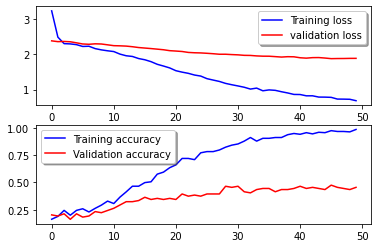

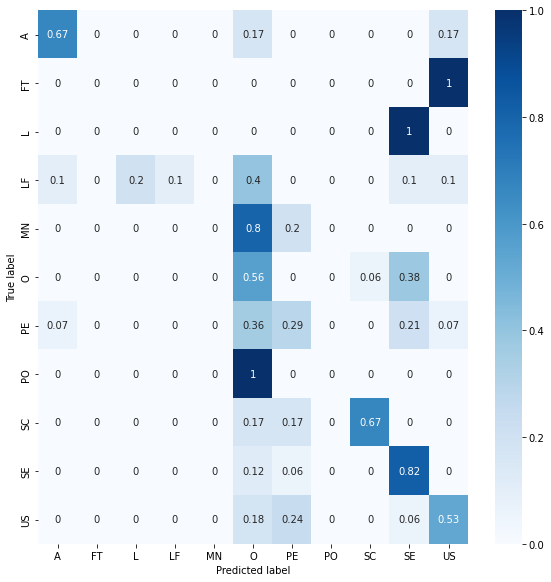

オントロジーのみ


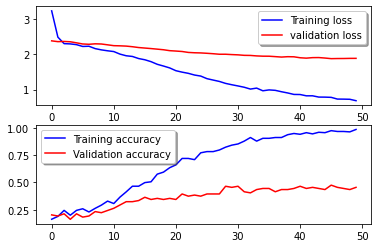

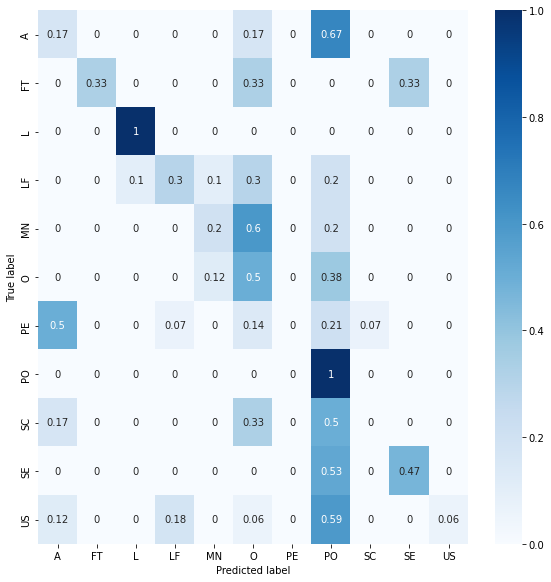

CNNオントロジー


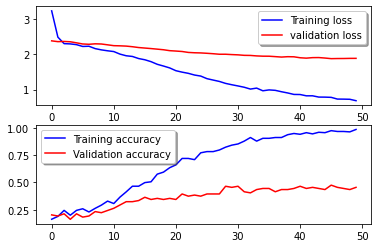

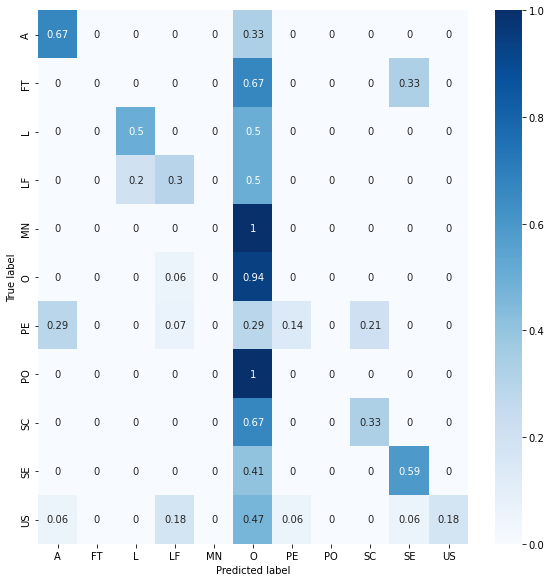

正解


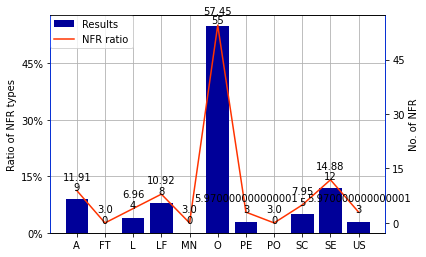

2位正解
{'A': 9, 'FT': 0, 'L': 3, 'LF': 16, 'MN': 8, 'O': 31, 'PE': 4, 'PO': 0, 'SC': 13, 'SE': 11, 'US': 4}


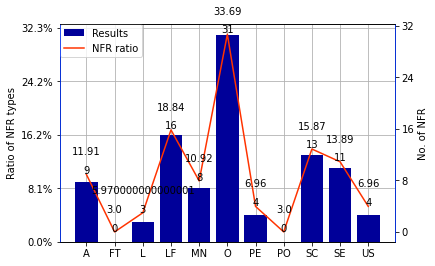

3位正解
{'A': 10, 'FT': 1, 'L': 4, 'LF': 6, 'MN': 13, 'O': 7, 'PE': 18, 'PO': 0, 'SC': 9, 'SE': 22, 'US': 9}


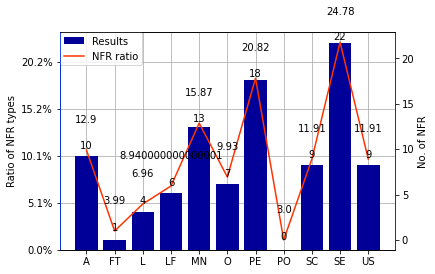

上位3位正解
{'A': 28, 'FT': 1, 'L': 11, 'LF': 30, 'MN': 21, 'O': 93, 'PE': 25, 'PO': 0, 'SC': 27, 'SE': 45, 'US': 16}


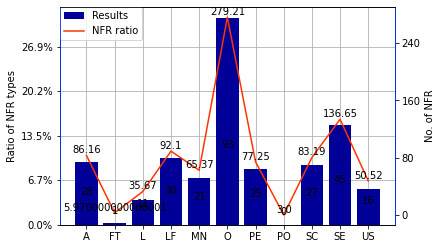

In [61]:
machinelearning_classifier = machinelearning_classifiers()
machinelearning_classifier.convolution_neural_network(
    test_count, x_train_w2v_document, y_train_document, x_test_w2v_document, y_test_document, test_sentences, test_anser, train_count, test_count
)

In [62]:
import openpyxl
from openpyxl.styles import Font
from openpyxl.styles import PatternFill
from openpyxl.styles.alignment import Alignment
from openpyxl.styles.borders import Border, Side

wb = openpyxl.Workbook()

ws = wb.worksheets[0]

ws.title = "result"

side = Side(style="thin", color="000000")

# 外枠罫線描画
def write_page_line(row_no):
    for row in ws[f"M{row_no}:M{row_no+35}"]:
        for cell in row:
            cell.border = Border(right=side)
    for row in ws[f"A{row_no}:A{row_no+35}"]:
        for cell in row:
            cell.border = Border(left=side)
    for row in ws[f"A{row_no}:M{row_no}"]:
        for cell in row:
            cell.border = Border(top=side)
    for row in ws[f"A{row_no+35}:M{row_no+35}"]:
        for cell in row:
            cell.border = Border(bottom=side)


def write_page_header_footer(input_data_name, page_no, row_no):
    for row in ws[f"A{row_no}:M{row_no}"]:
        for cell in row:
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    ws.merge_cells(f"A{row_no}:M{row_no}")
    cell = ws[f"A{row_no}"]
    cell.value = "非機能要求要約レポート"
    cell.font = Font(size=14, bold=True)
    cell.alignment = Alignment(horizontal="center", vertical="center", wrap_text=False)

    for row in ws[f"A{row_no+1}:M{row_no+1}"]:
        for cell in row:
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    ws.merge_cells(f"A{row_no+1}:B{row_no+1}")
    cell = ws[f"A{row_no+1}"]
    cell.value = "対象ファイル"
    cell.fill = PatternFill(patternType="solid", fgColor="ccffcc")
    cell.alignment = Alignment(horizontal="center", vertical="center", wrap_text=False)
    ws.merge_cells(f"C{row_no+1}:M{row_no+1}")
    cell = ws[f"C{row_no+1}"]
    cell.value = input_data_name

    for row in ws[f"A{row_no+2}:B{row_no+2}"]:
        for cell in row:
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    ws.merge_cells(f"A{row_no+2}:B{row_no+2}")
    cell = ws[f"A{row_no+2}"]
    cell.value = "要求数"
    cell.fill = PatternFill(patternType="solid", fgColor="ccffcc")
    cell.alignment = Alignment(horizontal="center", vertical="center", wrap_text=False)
    cell = ws[f"C{row_no+2}"]
    cell.value = "99"
    cell.alignment = Alignment(horizontal="right")
    cell.border = Border(top=side, bottom=side, left=side, right=side)

    for row in ws[f"A{row_no+4}:M{row_no+4}"]:
        for cell in row:
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    ws.merge_cells(f"A{row_no+4}:M{row_no+4}")
    cell = ws[f"A{row_no+4}"]
    cell.value = "要約結果"
    cell.font = Font(size=12, bold=True)
    cell.fill = PatternFill(patternType="solid", fgColor="ccffcc")
    cell.alignment = Alignment(horizontal="center", vertical="center", wrap_text=False)

    for row in ws[f"A{row_no+35}:M{row_no+35}"]:
        for cell in row:
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    ws.merge_cells(f"A{row_no+35}:M{row_no+35}")
    cell = ws[f"A{row_no+35}"]
    cell.value = page_no
    cell.alignment = Alignment(horizontal="center", vertical="center", wrap_text=False)


def write_rank_result(data, rank, row_no):
    type_name = {
        "A": "Availability",
        "FT": "Fault Tolerance",
        "L": "Legal",
        "LF": "Look & Feel",
        "MN": "Maintainability",
        "O": "Operational",
        "PE": "Performance",
        "PO": "Portability",
        "SC": "Scalability",
        "SE": "Security",
        "US": "Usability",
    }
    for row in ws[f"A{row_no}:M{row_no}"]:
        for cell in row:
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    ws.merge_cells(f"A{row_no}:M{row_no}")
    cell = ws[f"A{row_no}"]
    if rank != 4:
        cell.value = f"{rank}位"
    else:
        cell.value = "上位3位"
    cell.font = Font(size=12, bold=True)
    cell.fill = PatternFill(patternType="solid", fgColor="ccffcc")
    cell.alignment = Alignment(horizontal="center", vertical="center", wrap_text=False)

    for row in ws[f"A{row_no+1}:M{row_no+1}"]:
        for cell in row:
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    ws[f"F{row_no+1}"].border = Border(right=side)
    ws.merge_cells(f"A{row_no+1}:F{row_no+1}")
    cell = ws[f"A{row_no+1}"]
    cell.value = "タイプ別要求数"
    cell.font = Font(bold=True)
    cell.fill = PatternFill(patternType="solid", fgColor="ccffcc")
    cell.alignment = Alignment(horizontal="center", vertical="center", wrap_text=False)
    ws.merge_cells(f"G{row_no+1}:M{row_no+1}")
    cell = ws[f"G{row_no+1}"]
    cell.value = "要約グラフ"
    cell.font = Font(bold=True)
    cell.fill = PatternFill(patternType="solid", fgColor="ccffcc")
    cell.alignment = Alignment(horizontal="center", vertical="center", wrap_text=False)

    for row in ws[f"A{row_no+2}:F{row_no+2}"]:
        for cell in row:
            cell.font = Font(size=12)
            cell.fill = PatternFill(patternType="solid", fgColor="ccffcc")
            cell.alignment = Alignment(
                horizontal="center", vertical="center", wrap_text=False
            )
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    ws.merge_cells(f"C{row_no+2}:D{row_no+2}")
    ws[f"A{row_no+2}"].value = "Seq"
    ws[f"B{row_no+2}"].value = "タイプ"
    ws[f"C{row_no+2}"].value = "タイプ名"
    ws[f"E{row_no+2}"].value = "割合"
    ws[f"F{row_no+2}"].value = "要求数"

    for row in ws[f"A{row_no+3}:F{row_no+13}"]:
        for cell in row:
            cell.font = Font(size=12, bold=True)
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    for n, (key, value) in enumerate(data[rank - 1].items()):
        data_percentage = round(100 / sum(data[rank - 1].values()), 2)
        ws.merge_cells(f"C{row_no+3+n}:D{row_no+3+n}")
        ws[f"A{row_no+3+n}"].value = n + 1
        ws[f"B{row_no+3+n}"].value = key
        ws[f"C{row_no+3+n}"].value = type_name[key]
        try:
            ws[f"E{row_no+3+n}"].number_format = "0.00"
            ws[f"E{row_no+3+n}"].value = data_percentage * value
        except ZeroDivisionError:
            ws[f"E{row_no+3+n}"].value = 0
        ws[f"F{row_no+3+n}"].value = value

    for row in ws[f"A{row_no+14}:F{row_no+14}"]:
        for cell in row:
            cell.font = Font(size=12)
            cell.fill = PatternFill(patternType="solid", fgColor="ccffff")
            cell.border = Border(top=side, bottom=side, left=side, right=side)
    ws.merge_cells(f"A{row_no+14}:E{row_no+14}")
    ws[f"A{row_no+14}"].value = "合計"
    ws[f"F{row_no+14}"].value = sum(data[rank - 1].values())
    img = openpyxl.drawing.image.Image(img_data[rank-1])
    img.width = 72 * 5.9
    img.height = 25 * 10
    ws.add_image(img, f"G{row_no+2}")


write_page_line(1)
write_page_header_footer(input_testdata, 1, 1)
write_rank_result(output_data, 1, 6)
write_rank_result(output_data, 2, 21)
write_page_line(38)
write_page_header_footer(input_testdata, 2, 38)
write_rank_result(output_data, 3, 43)
write_rank_result(output_data, 4, 58)
wb.save("/content/drive/MyDrive/output.xlsx")


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (150000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
